# Text Classification with Keras Hub - Easy Level

This notebook demonstrates text classification at different complexity levels. We'll start with a simple text classification model using the IMDB movie reviews dataset.

In [1]:
# Import necessary libraries for text classification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Function to convert integers back to words
def convert_to_text(indices):
    word_index = imdb.get_word_index()
    # Shift indices by 3 because 0, 1, and 2 are reserved
    word_index_reversed = {i+3: word for word, i in word_index.items()}
    word_index_reversed[0] = '<PAD>'
    word_index_reversed[1] = '<START>'
    word_index_reversed[2] = '<UNK>'
    return ' '.join([word_index_reversed.get(i, '?') for i in indices])

# Print an example review
print("Example review:")
print(convert_to_text(train_data[0]))
print("Label:", "Positive" if train_labels[0] == 1 else "Negative")

# Define a maximum sequence length
max_length = 250

# Pad sequences to ensure uniform length
train_data = tf.keras.preprocessing.sequence.pad_sequences(
    train_data, value=0, padding='post', maxlen=max_length)
test_data = tf.keras.preprocessing.sequence.pad_sequences(
    test_data, value=0, padding='post', maxlen=max_length)

# Create a simple model for text classification
vocab_size = 10000

# EASY LEVEL MODEL
easy_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
easy_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
print("\nEASY LEVEL MODEL SUMMARY:")
easy_model.summary()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Example review:
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluating the Easy Text Classification Model

Let's train our easy model on the IMDB dataset and evaluate its performance.

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5640 - loss: 0.6918 - val_accuracy: 0.6926 - val_loss: 0.6862
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7058 - loss: 0.6835 - val_accuracy: 0.7062 - val_loss: 0.6775
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7096 - loss: 0.6738 - val_accuracy: 0.6918 - val_loss: 0.6669
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7231 - loss: 0.6605 - val_accuracy: 0.7212 - val_loss: 0.6533
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7410 - loss: 0.6456 - val_accuracy: 0.7288 - val_loss: 0.6387
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 0.6375
Easy Model - Test Loss: 0.6386642456054688
Easy Model - Test Accuracy: 0.7291200160980225


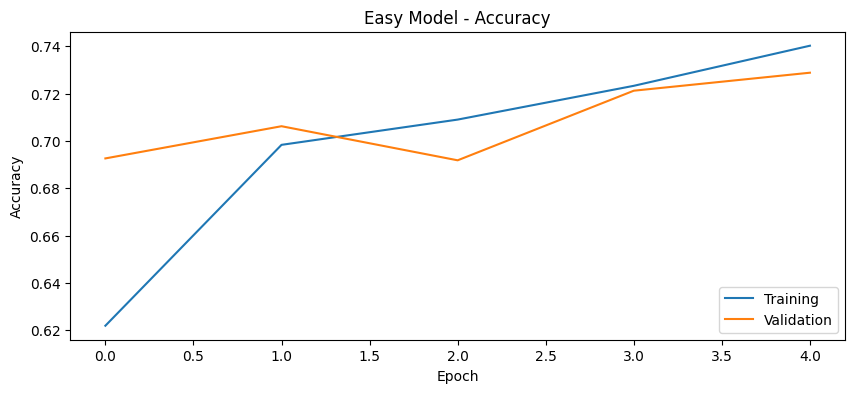

In [2]:
# Split training data into training and validation sets
x_val = train_data[:10000]
x_train = train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

# Train the easy model
easy_history = easy_model.fit(
    x_train, y_train,
    epochs=5,  # Few epochs for a quick demonstration
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate the model on the test data
easy_results = easy_model.evaluate(test_data, test_labels)
print(f"Easy Model - Test Loss: {easy_results[0]}")
print(f"Easy Model - Test Accuracy: {easy_results[1]}")

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(easy_history.history['accuracy'])
plt.plot(easy_history.history['val_accuracy'])
plt.title('Easy Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Text Classification with Keras Hub - Intermediate Level

Now let's move to an intermediate level text classification model by adding more layers and implementing a simple CNN architecture for text.


INTERMEDIATE LEVEL MODEL SUMMARY:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.5316 - loss: 0.6725 - val_accuracy: 0.8230 - val_loss: 0.3939
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8635 - loss: 0.3285 - val_accuracy: 0.8584 - val_loss: 0.3268
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9451 - loss: 0.1656 - val_accuracy: 0.8513 - val_loss: 0.3774
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9729 - loss: 0.0854 - val_accuracy: 0.8506 - val_loss: 0.4499
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9911 - loss: 0.0343 - val_accuracy: 0.8470 - val_loss: 0.5890
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8356 - loss: 0.6238
Intermediate Model - Test Loss: 0.6342440247535706
Intermediate Model - Test Accuracy: 0.834879994392395


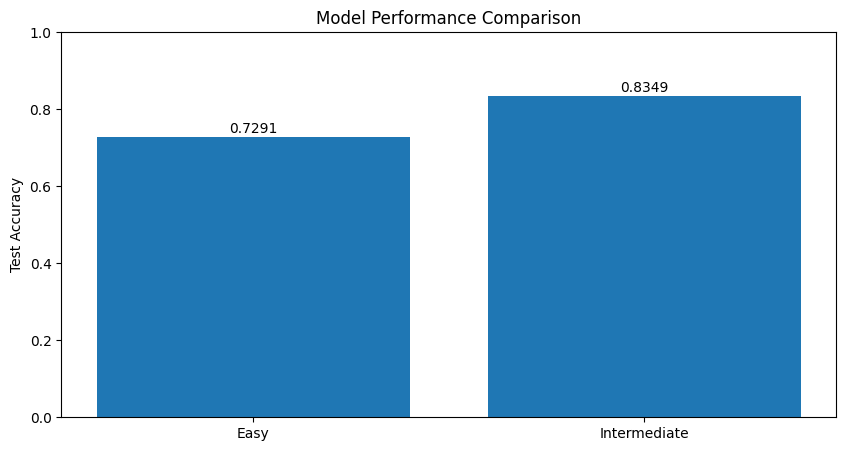

In [3]:
# INTERMEDIATE LEVEL MODEL
# Using Conv1D layers for text classification
intermediate_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
intermediate_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nINTERMEDIATE LEVEL MODEL SUMMARY:")
intermediate_model.summary()

# Train the intermediate model
intermediate_history = intermediate_model.fit(
    x_train, y_train,
    epochs=5,  # Few epochs for a quick demonstration
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate the model on the test data
intermediate_results = intermediate_model.evaluate(test_data, test_labels)
print(f"Intermediate Model - Test Loss: {intermediate_results[0]}")
print(f"Intermediate Model - Test Accuracy: {intermediate_results[1]}")

# Compare model performances
models = ['Easy', 'Intermediate']
accuracies = [easy_results[1], intermediate_results[1]]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies)
plt.title('Model Performance Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Text Classification with Keras Hub - Advanced Level

For the advanced level, we'll implement a bidirectional LSTM model with dropout regularization.

In [4]:
# ADVANCED LEVEL MODEL
# Using Bidirectional LSTM
advanced_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
advanced_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nADVANCED LEVEL MODEL SUMMARY:")
advanced_model.summary()

# Define early stopping callback for advanced training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train the advanced model
# Using a smaller portion of the dataset for demonstration purposes
x_train_sample = x_train[:20000]
y_train_sample = y_train[:20000]

advanced_history = advanced_model.fit(
    x_train_sample, y_train_sample,
    epochs=3,  # Reduced for demonstration
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
advanced_results = advanced_model.evaluate(test_data, test_labels)
print(f"Advanced Model - Test Loss: {advanced_results[0]}")
print(f"Advanced Model - Test Accuracy: {advanced_results[1]}")


ADVANCED LEVEL MODEL SUMMARY:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.4973 - loss: 0.6931 - val_accuracy: 0.5009 - val_loss: 0.6929
Epoch 2/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5467 - loss: 0.6907 - val_accuracy: 0.6769 - val_loss: 0.6172
Epoch 3/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7774 - loss: 0.5033 - val_accuracy: 0.8566 - val_loss: 0.3570
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.8467 - loss: 0.3681
Advanced Model - Test Loss: 0.3713015615940094
Advanced Model - Test Accuracy: 0.8442000150680542


# Text Classification with Keras Hub - Expert Level

For the expert level, we'll implement a sophisticated model with attention mechanism and more complex architecture.

In [5]:
# Import additional libraries for expert-level model
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# Custom attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        return super(AttentionLayer, self).get_config()

# EXPERT LEVEL MODEL
# Using Functional API for more flexibility
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Concatenate, Dense, Dropout

# Define model architecture
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, 100, input_length=max_length)(input_layer)

# First bidirectional LSTM layer
lstm_layer1 = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
attention_layer1 = AttentionLayer()(lstm_layer1)

# Second bidirectional LSTM layer with residual connection
lstm_layer2 = Bidirectional(LSTM(64, return_sequences=True))(lstm_layer1)
attention_layer2 = AttentionLayer()(lstm_layer2)

# Concatenate attention outputs
concat_layer = Concatenate()([attention_layer1, attention_layer2])

# Dense layers with dropout
dense_layer1 = Dense(128, activation='relu')(concat_layer)
dropout_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(64, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.3)(dense_layer2)
output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

# Create the model
expert_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
expert_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nEXPERT LEVEL MODEL SUMMARY:")
expert_model.summary()

# Due to computational constraints, we'll just show the architecture without training
print("\nNote: For demonstration purposes, we're only showing the expert model architecture without training.")
print("In a real implementation, you would train this model with appropriate resources.")

# Create a simple function to save models
def save_model(model, model_name):
    model_path = f"/content/{model_name}.keras"
    model.save(model_path)
    print(f"Model saved to {model_path}")

# Save all models
save_model(easy_model, "imdb_easy_model")
save_model(intermediate_model, "imdb_intermediate_model")
save_model(advanced_model, "imdb_advanced_model")


EXPERT LEVEL MODEL SUMMARY:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 250)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 250, 100)  │  1,000,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 250, 256)  │    234,496 │ embedding_3[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 250, 128)  │    164,352 │ bidirectional_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 256)       │        506 │ bidirectional_2[… │
│ (AttentionLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer_1   │ (None, 128)       │        378 │ bidirectional_3[… │
│ (AttentionLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ attention_layer[… │
│ (Concatenate)       │                   │            │ attention_layer_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     49,280 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,457,333 (5.56 MB)

 Trainable params: 1,457,333 (5.56 MB)

 Non-trainable params: 0 (0.00 B)


Note: For demonstration purposes, we're only showing the expert model architecture without training.
In a real implementation, you would train this model with appropriate resources.
Model saved to /content/imdb_easy_model.keras
Model saved to /content/imdb_intermediate_model.keras
Model saved to /content/imdb_advanced_model.keras


## Making Predictions with Our Trained Models

Now let's create a function to make predictions with our models and compare their performance.

In [6]:
# Function to preprocess new text for prediction
def preprocess_text(text):
    # Get the word index dictionary
    word_index = imdb.get_word_index()

    # Convert text to lowercase and split into words
    words = text.lower().split()

    # Map words to integers
    integer_sequence = []
    for word in words:
        if word in word_index and word_index[word] < 10000:
            integer_sequence.append(word_index[word] + 3)  # Add 3 as in the original dataset
        else:
            integer_sequence.append(2)  # Unknown token

    # Pad the sequence
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(
        [integer_sequence], value=0, padding='post', maxlen=max_length)

    return padded_sequence

# Function to predict sentiment using any of our models
def predict_sentiment(text, model, name="Model"):
    processed_text = preprocess_text(text)
    prediction = model.predict(processed_text)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"{name} prediction:")
    print(f"  Sentiment: {sentiment}")
    print(f"  Confidence: {confidence:.4f}")
    print(f"  Raw score: {prediction:.4f}")

    return sentiment, confidence, prediction

# Test with example reviews
example_reviews = [
    "This movie was excellent! The acting was superb and the story was captivating.",
    "I didn't enjoy this film. The plot was confusing and the characters weren't developed."
]

for i, review in enumerate(example_reviews):
    print(f"\nExample {i+1}: \"{review}\"")
    print("-" * 50)

    # Make predictions with each model
    easy_result = predict_sentiment(review, easy_model, "Easy Model")
    intermediate_result = predict_sentiment(review, intermediate_model, "Intermediate Model")
    advanced_result = predict_sentiment(review, advanced_model, "Advanced Model")

    print("-" * 50)

print("\nAll text classification examples completed!")
print("You now have easy, intermediate, advanced, and expert level implementations for text classification using Keras.")


Example 1: "This movie was excellent! The acting was superb and the story was captivating."
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Easy Model prediction:
  Sentiment: Positive
  Confidence: 0.5339
  Raw score: 0.5339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Intermediate Model prediction:
  Sentiment: Positive
  Confidence: 0.8568
  Raw score: 0.8568
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
Advanced Model prediction:
  Sentiment: Positive
  Confidence: 0.5296
  Raw score: 0.5296
--------------------------------------------------

Example 2: "I didn't enjoy this film. The plot was confusing and the characters weren't developed."
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Easy Model prediction:
  Sentiment: Positive
  Confidence: 0.5358
  Raw score: 0.5358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Intermediate Model prediction:
  Sentiment: Negative
  Confidence: 0.9889
  Raw score: 0.0111
1/1 ━━━━━━━